<a href="https://colab.research.google.com/github/bngrossmann/new-york-crime-analysis/blob/main/New_York_Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New York Crime Analysis

* Benjamin Grossmann

# Part 1


Your second project is going to have a lot more freedom than your first project. This is because we want you to have a project in your portfolio that interests you or relates to the industry you would like to work in.

Your task for this week is to propose two possible datasets you would like to work with for Project 2.  

You will choose your first choice data set, and a backup data set in case the first proposed data set is not approved.  

This data can be from any source and can be on any topic with these limitations:

the data must be available for use (it is your responsibility to ensure that the license states that you are able to use it.)
the data must be appropriate for a professional environment
the data must NOT contain personal information
the data must NOT be a dataset used for any assignment, lecture, or task from the course
Make sure you select a dataset that will be reasonable to work with in the amount of time we have left. Think about what questions you could reasonably answer with the dataset you select. 

You must propose two datasets that each have a supervised learning component. You may choose a regression or classification problem for each proposed data set.

**For this task:**

Create a Colab notebook where you have uploaded and shown the .head() of each of your data sets.  For each of the proposed datasets, answer the following questions:

## **Dataset #1**


In [800]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [801]:
# Load your data & imports
import numpy as np
import pandas as pd

In [802]:
df = pd.read_csv("/content/drive/MyDrive/Coding Dojo/Data Folder/NYPD_Complaint_Data_Current__Year_To_Date_.csv")

In [803]:
# .head() for your dataframe
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,903695881,69,NaN,12/17/2021,22:13:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1011203,174515,40.645647,-73.902876,"(40.64564719600002, -73.90287588699994)",POINT (-73.90287588699994 40.64564719600002)
1,400462399,113,NaN,12/17/2021,06:21:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,F,1043252,187998,40.682499,-73.787269,"(40.682499421000045, -73.78726915499993)",POINT (-73.78726915499993 40.682499421000045)
2,587910690,113,NaN,12/13/2021,20:05:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1042087,190443,40.689218,-73.791449,"(40.689218058000044, -73.79144856999993)",POINT (-73.79144856999993 40.689218058000044)
3,186105368,52,BRONX,12/07/2021,22:49:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,E,1017088,260895,40.882718,-73.881247,"(40.88271780700006, -73.88124724999993)",POINT (-73.88124724999993 40.88271780700006)
4,185325394,113,NaN,12/06/2021,17:25:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1046176,193100,40.696483,-73.776680,"(40.69648322200004, -73.77667979199998)",POINT (-73.77667979199998 40.69648322200004)


In [804]:
df.shape

(449506, 36)

## Questions

### 1) source of your data

The data comes from the New York City Police Department.

https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243


### 2) Brief description of data

The data includes report information about crimes reported to the NYPD. (Location: Coordinates and Descriptive; Day and Time; Suspect Profile Information; Victim Profile Information; Weather; and several others)

### 3) What is the target?

The target is `"LAW_CAT_CD"`, which is the level of offense (felony, misdemeanor, violation).

###  4) Is this a classification or regression problem?

This will be a classification problem.

### 5) How many features?
Although the dataset has 35 features after being separated from the target, many of them are unnecessary and should be removed before any modeling is done.

For example, there are multiple location features. Two pair of which express the same coordinate information in two different coordiante systems.

There are also several features that are codes which ways of encoding report information and should not be used. They do not predict the target. They were explictly created by the reporting system after the crime was reported and cannot be used to predict future events (they postdict).

A thourough examination of the data will be required to determine all the features that should be removed before modeling.


### 6) How many rows of data.

The dataset has 449,506 rows of data

### 7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

There are several columns which have a lot of missing values. Some missing values may be acceptable (`"PARKS_NM"` has no value if the occurance did not happen in a park), and can be accomadated.

And as mentioned above in question 5, several of the columns should not be used because they may have values that are determined by the target values. Determining which ones may take some research.

Some columns (such as some of the description columns) have multiple values within a single cell. It may be necessary to break them apart into their component values.

#Data Dictionary

Column Name|Description|Type
-|-|-
CMPLNT_NUM|Randomly generated persistent ID for each complaint|Number
ADDR_PCT_CD|The precinct in which the incident occurred|Number
BORO_NM|The name of the borough in which the incident occurred|Plain Text
CMPLNT_FR_DT|Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)|Date & Time
CMPLNT_FR_TM|Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)|Plain Text
CMPLNT_TO_DT|Ending date of occurrence for the reported event, if exact time of occurrence is unknown|Date & Time
CMPLNT_TO_TM|Ending time of occurrence for the reported event, if exact time of occurrence is unknown|Plain Text
CRM_ATPT_CPTD_CD|Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely|Plain Text
HADEVELOPT|Name of NYCHA housing development of occurrence, if applicable|Plain Text
HOUSING_PSA|Development Level Code|Number
JURISDICTION_CODE|Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.|Number
JURIS_DESC|Description of the jurisdiction code|Plain Text
KY_CD|Three digit offense classification code|Number
LAW_CAT_CD|Level of offense: felony, misdemeanor, violation|Plain Text
LOC_OF_OCCUR_DESC|Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of|Plain Text
OFNS_DESC|Description of offense corresponding with key code|Plain Text
PARKS_NM|Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)|Plain Text
PATROL_BORO|The name of the patrol borough in which the incident occurred|Plain Text
PD_CD|Three digit internal classification code (more granular than Key Code)|Number	
PD_DESC|Description of internal classification corresponding with PD code (more granular than Offense Description)|Plain Text
PREM_TYP_DESC|Specific description of premises; grocery store, residence, street, etc.|Plain Text
RPT_DT|Date event was reported to police|Date & Time
STATION_NAME|Transit station name|Plain Text
SUSP_AGE_GROUP|Suspect’s Age Group|Plain Text
SUSP_RACE|Suspect’s Race Description|Plain Text
SUSP_SEX|Suspect’s Sex Description|Plain Text
TRANSIT_DISTRICT|Transit district in which the offense occurred.|Number	
VIC_AGE_GROUP|Victim’s Age Group|Plain Text
VIC_RACE|Victim’s Race Description|Plain Text
VIC_SEX|Victim’s Sex Description|Plain Text
X_COORD_CD|X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|Number
Y_COORD_CD|Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|Number
Latitude|Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|Number
Longitude|Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|Number
Lat_Lon||Location
New Georeferenced Column||Point

# 1 . Load Data

In [805]:
# from google.colab import drive
# drive.mount("/content/drive")

In [806]:
# import numpy as np
# import pandas as pd

In [807]:
# df = pd.read_csv("/content/drive/MyDrive/Coding Dojo/Data Folder/NYPD_Complaint_Data_Current__Year_To_Date_.csv")

In [808]:
initial_row_count = df.shape[0]

In [809]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449506 entries, 0 to 449505
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                449506 non-null  int64  
 1   ADDR_PCT_CD               449506 non-null  int64  
 2   BORO_NM                   448355 non-null  object 
 3   CMPLNT_FR_DT              449506 non-null  object 
 4   CMPLNT_FR_TM              449506 non-null  object 
 5   CMPLNT_TO_DT              409416 non-null  object 
 6   CMPLNT_TO_TM              409568 non-null  object 
 7   CRM_ATPT_CPTD_CD          449345 non-null  object 
 8   HADEVELOPT                1577 non-null    object 
 9   HOUSING_PSA               32583 non-null   float64
 10  JURISDICTION_CODE         449023 non-null  float64
 11  JURIS_DESC                449506 non-null  object 
 12  KY_CD                     449506 non-null  int64  
 13  LAW_CAT_CD                449506 non-null  o

Given that there are 36 rows, I will construct a function that will let me examine the kind of data within the row and how much data is missing.

In [810]:
# Function for showing unique values and missing rows from columns of a dataframe
def show_column_values(dataframe,column_list=[]):
    for col in column_list:
        print(f"{col:>18} : {dataframe[col].nunique():>5} : {dataframe[col].value_counts().sort_index().index.to_list()}")
        print(f"{':':>20} {dataframe.loc[ df[col].isna() , col].duplicated().sum():>5} : Rows Missing Data\n")

In [811]:
# Function for showing how many rows have been dropped
def show_dropped_row_count(dataframe):
    print(f"Total number of rows dropped: {dataframe.shape[0]:>8}")
    print(f"Initial number of rows dropped: {initial_row_count:>3}")
    print(f"Percent of rows dropped: {np.round(100 - 100 * dataframe.shape[0]/initial_row_count,1):>13} %")

## 1 . 2 . Identify the Target

The target value for this analysis is the level of the offense.
* `"LAW_CAT_CD"`
    > The level of the offense: felony, misdemeanor, or violation.

In [812]:
show_column_values(df,["LAW_CAT_CD"])

        LAW_CAT_CD :     3 : ['FELONY', 'MISDEMEANOR', 'VIOLATION']
                   :     0 : Rows Missing Data



If a greater distinction amoung the crimes is required, then an alternate target can be `"OFNS_DESC"`.

# 2 . Uniqueness and Duplication

Each data row is suppose to represent a single unique complaint identified in the `"CMPLNT__NUM"` column. So there should be no duplicates.

In [813]:
print(f"{df.shape[0]} Rows in the data table")
print(f"{df['CMPLNT_NUM'].nunique()} Unique Entries in the complaint number column")
print(f"{df.duplicated().sum():>6} Duplicated table rows")

449506 Rows in the data table
449506 Unique Entries in the complaint number column
     0 Duplicated table rows


Verified that no rows are duplicated.

Since the values for `"CMPLNT_NUM"` are unique integers for each row, they can be used as the row index.

In [814]:
df.set_index("CMPLNT_NUM",inplace=True);

Now that the unique complaint number has been changed to the index, I can check again for duplicate rows. These new duplicates will indicate that there were probably mulitple suspects or mutiple victims at each incident, with each addtional suspect or victim contributing to new rows in the data table.

In [815]:
print(f"{df.duplicated().sum()} Duplicated table rows")

1576 Duplicated table rows


Now I must make a choice of whether I will drop these new duplicates. I can either drop them and only consider each group of new duplicates as a single event. Or I can keep them and consider each new duplicate a separate event.

From a resource perspective, I will consider each new duplicate a separate event. Although these new duplicates happen in groups, it may require more resources to respond to a single group of events.

This choice may effect the results based on how often these groups of event occur.

In [816]:
print(f"New duplicates account for {df.duplicated().sum() / df.shape[0]*100:.2f}% of all complaints.")

New duplicates account for 0.35% of all complaints.


Since the new duplicates only account for just over a third of one percent, they are not very common (less than four out of every thousand).

Further justification for keeping these new duplicate can be found by considering who may be invovled. These duplicates are those where the suspects and victims necessarily share demographic characteristics. If a single group of events had suspects and victims with different demographic characteristics, then data rows conresponding the these different individuals would not be duplicates.

At this stage in the analysis, I am not yet prepared to determine any group events that have non-duplicated rows of data. After I do so, it will be possible to do comparative analysis to see if grouping simultaneous events as a single occurance has any detectable consequences. There may be some applications where such grouping is a better measure than having them treated as separate these events.

# 3 . Eliminating Unnecessary Columns

In building a model that can help me understand where different kinds of crimes are happening, I need to separate the information that can be used to help allocate resources from the information that which cannot.

Time and location are quantities that must occur for any complaint, and exist even if there is no complaint. These are also important criteria to use when allocating resorces. Without these pieces of information there is no framework for understanding the layout of the city.

Since I will be dropping columns several times, I will make a function to assist me and report how many columns remain.


In [817]:
# Function for dropping a list of columns from a dataframe and reporting it
def drop_columns(dataframe, column_list=[]):
    print(f"{dataframe.shape[1]} columns before the drop.")
    dataframe.drop(columns=column_list, inplace=True)
    print(f"{dataframe.shape[1]} columns after the drop.")

## 3 . 1 . Suspect and Victim Demographics

There are only three characteristics in the data set given for suspect and victim demographics: sex, age, and race.
* `"SUSP_SEX"`, `"VIC_SEX"`
> Sex of the suspect or victim
* `"SUSP_RACE"`, `"VIC_RACE"`
> Race of the suspect or victim
* `"SUSP_AGE_GROUP"`, `"VIC_AGE_GROUP"`
> Age group of the suspect or victim

I can look at how these values are recorded. I will display the values in ascending order (alphabetically and increasing numerically) and how much data is missing.

In [818]:
show_column_values(df,["SUSP_SEX","SUSP_RACE","SUSP_AGE_GROUP","VIC_SEX","VIC_RACE","VIC_AGE_GROUP"])

          SUSP_SEX :     3 : ['F', 'M', 'U']
                   : 88133 : Rows Missing Data

         SUSP_RACE :     7 : ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC']
                   : 88133 : Rows Missing Data

    SUSP_AGE_GROUP :    26 : ['-33', '-60', '-69', '-941', '-946', '-947', '-955', '-966', '-969', '-971', '-973', '-975', '1017', '1032', '1056', '18-24', '2021', '25-44', '45-64', '65+', '938', '940', '942', '953', '<18', 'UNKNOWN']
                   : 88133 : Rows Missing Data

           VIC_SEX :     4 : ['D', 'E', 'F', 'M']
                   :     0 : Rows Missing Data

          VIC_RACE :     7 : ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC']
                   :    80 : Rows Missing Data

     VIC_AGE_GROUP :    21 : ['-1', '-3', '-4', '-48', '-51', '-61', '-62', '-921', '-935', '-943', '-960', '18-24',

These won't be very helpful to understand how crime is distributed as people matching these descriptions can be found throughout the city. Further, many complaints have no information about the suspect. And victims can include businesses and organizations (sex `"D"`) and the People of the State of New York  (sex `"E"`)

A quick calculation can even show how much suspect information is unavailable. (As per the NYPD Complaints Incident Level Data Footnotes, item number 2, null values should be considered as either "Unknown/Not Available/Not Reported").

In [819]:
for col,val in zip(("SUSP_SEX","SUSP_RACE","SUSP_AGE_GROUP"),("U","UNKNOWN","UNKNOWN")):
    print(f"{df.loc[ df[col]==val , col].count() /  df[col].shape[0] * 100:.2f}% Rows with {col} {val}")
    print(f"{df[col].isna().sum() /  df[col].shape[0] * 100:.2f}% Rows with {col} null")
    print(f"{(df[col].isna().sum()+df.loc[ df[col]==val , col].count()) /  df[col].shape[0] * 100:.2f}% Total Rows\n")

21.14% Rows with SUSP_SEX U
19.61% Rows with SUSP_SEX null
40.75% Total Rows

24.82% Rows with SUSP_RACE UNKNOWN
19.61% Rows with SUSP_RACE null
44.42% Total Rows

37.32% Rows with SUSP_AGE_GROUP UNKNOWN
19.61% Rows with SUSP_AGE_GROUP null
56.92% Total Rows



With this much information unavailable (over 40%), these columns would be problamatic if they were kept. So I will drop these from the working dataframe. (This is even without considering all the additional age values that don't represent real ages.)

In [820]:
drop_columns(df,["SUSP_SEX","SUSP_RACE","SUSP_AGE_GROUP","VIC_SEX","VIC_RACE","VIC_AGE_GROUP"])

35 columns before the drop.
29 columns after the drop.


## 3 . 2 . Location Data

There are several columns that descibe the location of the complaint. Some of them are too general, others are too specific, and some are redudant.



Primary Location Information
* `"ADDR_PCT_CD"` (Precinct) (KEEP)
>New York is divided into 77 precincts. This is the level that neighborhood communities and law enforcement will typically interact. Additionally, some offenses are assigned alternate locations than where they actually occured. (NYPD Complaints Incident Level Data Footnotes, items number 10 through 13, 15). This makes location resolution smaller than the precinct level less accurate.

Too General
*  `"BORO_NM"` (Borough) (DROP)
>New York City has five boroughs. Each has a significantly large population density (four of which are greater than any other city in the country). Locating where events occur by borough is too broad, so I will drop the column. If for some reason the boroughs should become an important feature to include, then it can be added back in as each precinct is within a specific borough (there is the exception of Marble Hill).

* `"PATROL_BORO"` (Patrol Borough) (DROP)
>The patrol borough value  divides three of the boroughs into a north and south region. But otherwise, the size of these patrol boroughs are still too broad.

Too Specific and Redundant

* `"Latitude"` and `"Longitude"` (KEEP)
    > Geographical location given in the Global Coordinate System. It must be kept in mind that coordinates which are not relocated will be approximations to the nearest mid-block or street intersection. This falls in line with the NYPD Complaints Incident Level Data Footnotes, item 9, which states that trying to match locations to an exact address is not recommended.
>
>I can use these values to plot a crime heat map of the city, to estimate the center of each precinct, or even create a distribuition of different location types. However, I don't think using it simultaneously with the precint numbers is a good idea, as that would add extra weight to geographical location at the expense of other features.
* `"Lat_Lon"` and `"New Georeferenced Column"` (DROP)
    > The latitude and longitude coordinates given as an ordered pair. The new georeferenced column reverses the order of the latitude-longitude ordered pair. Because these ordered pairs contain the same information as the latitude and longitude, they provide no new information.
* `"X_COORD_CD"` and `"Y_COORD_CD"` (DROP)
    >  Geographical location given in the New York State Plane Coordinate System. These coordinates can be determined by transforming the latitude and longitude, so provide no new information.

In [821]:
drop_columns(df,["BORO_NM", "PATROL_BORO","X_COORD_CD","Y_COORD_CD","Lat_Lon","New Georeferenced Column"]),#"Latitude","Longitude"

29 columns before the drop.
23 columns after the drop.


(None,)

## 3 . 3 . Location Descriptions

These columns describe attributes about the locations where the complaint occurred.

* `"PREM_TYP_DESC"` (Premise Type Description) (KEEP)
>This describe the type of premise where the complaint occurred. The distribution of location types may be a factor in identifying areas more susceptible to crimes as there may be an association between the type of crime and the type of location.
>
>This is not a smaller resolution than the precinct, as for most values it doesn't identify where within a precinct an event occurs. (Some exceptions can be identified, but are not common. For example, if the value is `"CEMETARY"` and there is only one cemetary in the precinct if won't be difficult to geo-locate the crime.)

* `"LOC_OF_OCCUR_DESC"` (DROP)
>This describes the specific location on the premises the crime occured. Although important for an investigation, I don't believe this is particularly helpful for understanding the distribution of crime throughout the city.
 
The values in each column are listed below.






In [822]:
show_column_values(df,["PREM_TYP_DESC","LOC_OF_OCCUR_DESC"])

     PREM_TYP_DESC :    74 : ['ABANDONED BUILDING', 'AIRPORT TERMINAL', 'ATM', 'BANK', 'BAR/NIGHT CLUB', 'BEAUTY & NAIL SALON', 'BOOK/CARD', 'BRIDGE', 'BUS (NYC TRANSIT)', 'BUS (OTHER)', 'BUS STOP', 'BUS TERMINAL', 'CANDY STORE', 'CEMETERY', 'CHAIN STORE', 'CHECK CASHING BUSINESS', 'CHURCH', 'CLOTHING/BOUTIQUE', 'COMMERCIAL BUILDING', 'CONSTRUCTION SITE', 'DAYCARE FACILITY', 'DEPARTMENT STORE', 'DOCTOR/DENTIST OFFICE', 'DRUG STORE', 'DRY CLEANER/LAUNDRY', 'FACTORY/WAREHOUSE', 'FAST FOOD', 'FERRY/FERRY TERMINAL', 'FOOD SUPERMARKET', 'GAS STATION', 'GROCERY/BODEGA', 'GYM/FITNESS FACILITY', 'HIGHWAY/PARKWAY', 'HOMELESS SHELTER', 'HOSPITAL', 'HOTEL/MOTEL', 'JEWELRY', 'LIQUOR STORE', 'LOAN COMPANY', 'MAILBOX INSIDE', 'MAILBOX OUTSIDE', 'MARINA/PIER', 'MOSQUE', 'OPEN AREAS (OPEN LOTS)', 'OTHER', 'OTHER HOUSE OF WORSHIP', 'PARK/PLAYGROUND', 'PARKING LOT/GARAGE (PRIVATE)', 'PARKING LOT/GARAGE (PUBLIC)', 'PHOTO/COPY', 'PRIVATE/PAROCHIAL SCHOOL', 'PUBLIC BUILDING', 'PUBLIC SCHOOL', 'RESIDENCE - 

The values in `"PREM_TYP_DESC"` are clearly meant to distinguish different type of locations. Some are similar, and can potentially be merged into common categories if the need should arise (such as the mulitple types of residences).


In [823]:
drop_columns(df,["LOC_OF_OCCUR_DESC"])

23 columns before the drop.
22 columns after the drop.


## 3 . 4 . Special Locations

There are a few columns that provide special location information.
* `"HADEVELOPT"` (DROP)
    > Name of a New York City Housing Authority Development, if applicable.
* `"PARKS_NM"` (DROP)
    >  Name of a New York City park, playground, or greenspace, if applicable.
* `"STATION_NAME"` (DROP)
    > Name of a Transit Station, if applicable.
* `"TRANSIT_DISTRICT"` (DROP)
    > Name of a Transit District, if applicable.

Each of these features probably provides too much resolution or nuance for the purposes of this project. I can check that each of these columns is strongly associated with the corresponding descriptions from the `"PREM_TYP_DESC"` column.



In [824]:
print("Greatest Premise Type Description for Each Special Location Type")
for col in ["HADEVELOPT","PARKS_NM","STATION_NAME","TRANSIT_DISTRICT"]:
    # print the most frequent of the premise types that has a value in the iterated column
    print(f"{col:>16} : {df.loc[ ~df[col].isna(), 'PREM_TYP_DESC'].value_counts().index.to_list()[0]}")
    # print the number of occurences for the most frequent of the premise types and all premise types that have values in the iterated column
    print(f"{'':>16} : {df.loc[ ~df[col].isna(), 'PREM_TYP_DESC'].value_counts()[0]} out of {df.loc[ ~df[col].isna(), 'PREM_TYP_DESC'].value_counts().sum()} data entries")
    # print the percent of occurences for the most frequent of the premise types that has a value in the iterated column
    print(f"{'':>16} : {df.loc[ ~df[col].isna(), 'PREM_TYP_DESC'].value_counts()[0]/df.loc[ ~df[col].isna(), 'PREM_TYP_DESC'].value_counts().sum()*100:.2f}%")
    
    # print the most 2nd frequent of the premise types that has a value in the iterated column
    print(f"{col:>16} : {df.loc[ ~df[col].isna(), 'PREM_TYP_DESC'].value_counts().index.to_list()[1]}")
    # print the number of occurences for the 2nd most frequent of the premise types and all premise types that have values in the iterated column
    print(f"{'':>16} : {df.loc[ ~df[col].isna(), 'PREM_TYP_DESC'].value_counts()[1]} out of {df.loc[ ~df[col].isna(), 'PREM_TYP_DESC'].value_counts().sum()} data entries")
    # print the percent of occurences for the 2nd most frequent of the premise types that has a value in the iterated column
    print(f"{'':>16} : {df.loc[ ~df[col].isna(), 'PREM_TYP_DESC'].value_counts()[1]/df.loc[ ~df[col].isna(), 'PREM_TYP_DESC'].value_counts().sum()*100:.2f}%")

Greatest Premise Type Description for Each Special Location Type
      HADEVELOPT : RESIDENCE - PUBLIC HOUSING
                 : 1530 out of 1572 data entries
                 : 97.33%
      HADEVELOPT : STREET
                 : 16 out of 1572 data entries
                 : 1.02%
        PARKS_NM : PARK/PLAYGROUND
                 : 2682 out of 3192 data entries
                 : 84.02%
        PARKS_NM : OTHER
                 : 111 out of 3192 data entries
                 : 3.48%
    STATION_NAME : TRANSIT - NYC SUBWAY
                 : 8840 out of 8976 data entries
                 : 98.48%
    STATION_NAME : TRANSIT FACILITY (OTHER)
                 : 59 out of 8976 data entries
                 : 0.66%
TRANSIT_DISTRICT : TRANSIT - NYC SUBWAY
                 : 8840 out of 8976 data entries
                 : 98.48%
TRANSIT_DISTRICT : TRANSIT FACILITY (OTHER)
                 : 59 out of 8976 data entries
                 : 0.66%


The correspondence is overwhelming, so I will drop the special locations from the dataframe.

In [825]:
drop_columns(df,["HADEVELOPT","PARKS_NM","STATION_NAME","TRANSIT_DISTRICT"])

22 columns before the drop.
18 columns after the drop.


## 3 . 5 . Jurisdiction

The jurisdiction for that is responsible for managing the response to incident can belong to one of 18 different departments. As it is unlikely that a significant number of incidences are carried out based on which authority's jurisdiction it will happen, I will drop these columns.
* `"JURISDICTION_CODE"` (DROP)
    > Numerical designation for a jurisdiction.
* `"JURIS_DESC"` (DROP)
    > Description name for a jurisdiction.



In [826]:
drop_columns(df,["JURISDICTION_CODE","JURIS_DESC"])

18 columns before the drop.
16 columns after the drop.


## 3 . 6 . Offense Codes

There are a few additional numerical codes that are used in this data set.

* `"OFNS_DESC"` (DROP)
    >Description of the offense. Types of crimes may be relevant, as differnt types will likely have different distributions throughout the city. This can be used as an alternate target if a more detailed analysis should be required. Otherwise, it should be dropped because each offense belongs only to one of the severity levels of the current target.

* `"PD_DESC"` (DROP)
    >These codes more greatly refine the encoding of the `"OFNS_DESC"` column, so would indicate extra information about specific crimes which goes beyond identifying general types of crime.

* `"KY_CD"` (DROP)
    >These are numerical codes corresponding to the descriptive values of the `"OFNS_DESC"` column. This is redundent information for this analysis.

* `"PD_CD"` (DROP)
    >These codes more greatly refine the encoding of the `"KY_CD"` column, so would indicate extra information about specific crimes which goes beyond identifying general types of crime.


In [827]:
drop_columns(df,["OFNS_DESC","PD_DESC","KY_CD","PD_CD"])

16 columns before the drop.
12 columns after the drop.


## 3 . 7 . Crime Completion

* `"CRM_ATPT_CPTD_CD"` (DROP)
    > Whether or not the crime was successfully completed or not doesn't alter the fact a crime was initiated.

In [828]:
drop_columns(df,["CRM_ATPT_CPTD_CD"])

12 columns before the drop.
11 columns after the drop.


## 3 . 8 . Additional Codes


* `"HOUSING_PSA"` (DROP) 
    >I am assuming this column is related to the Police Service Areas. There are nine Police Service Areas (PSA) in New York City, which patrol housing developments within 31 different precincts. Since this column has 362 unique values, I am not sure what it represents. Since each PSA contains mulitiple precincts, they are individually larger than the resolution I will be examining. I can only guess the many values in this column narrow down the location to a resolution smaller than what I want.


In [829]:
drop_columns(df,["HOUSING_PSA"])

11 columns before the drop.
10 columns after the drop.


## 3 . 9 . Time and Date

* `"CMPLNT_FR_DT"` and `"CMPLNT_FR_TM"` (KEEP)
    >When the event happens or begins is very relevant. All the data rows have these values present.
* `"CMPLNT_TO_DT"` and `"CMPLNT_TO_TM"` (DROP)
    >If present, these values indicate a time range when the crime occured. This column has many missing values as many crimes are known to happen at specific times. Since crime data is used to understand and to try to reduce crime, there is more value knowing when crimes are likely to begin rather than when they are likely to end. A crime can't be prevented if it has already happened.
* `"RPT_DT"` (DROP)
    > The date the crime was reported to the police does not alter when the crime actually occured.

In [830]:
drop_columns(df,["CMPLNT_TO_DT","CMPLNT_TO_TM","RPT_DT"])

10 columns before the drop.
7 columns after the drop.


# 4 . Data Types and Consistency


Of the remaining columns, I will review the dataframe information.

In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449506 entries, 903695881 to 806537994
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ADDR_PCT_CD    449506 non-null  int64  
 1   CMPLNT_FR_DT   449506 non-null  object 
 2   CMPLNT_FR_TM   449506 non-null  object 
 3   LAW_CAT_CD     449506 non-null  object 
 4   PREM_TYP_DESC  448236 non-null  object 
 5   Latitude       449506 non-null  float64
 6   Longitude      449506 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 27.4+ MB


## 4 . 1 . Date and Time Values

Here, the date and time columns are the object data type, but would probably be better served as the datetime datatype. However, I have encounted an error in trying to convert the strings into datetime values, so I will need to examine the strings more carefully.

### 4 . 1 . 1 . Date

First I will examine the date values by looking at their format.



In [832]:
display(df["CMPLNT_FR_DT"])
display(df["CMPLNT_FR_DT"].apply(type).head())

CMPLNT_NUM
903695881    12/17/2021
400462399    12/17/2021
587910690    12/13/2021
186105368    12/07/2021
185325394    12/06/2021
                ...    
798000815    01/08/2021
900510890    01/02/2021
244132985    01/02/2021
366756177    01/06/2021
806537994    08/01/2019
Name: CMPLNT_FR_DT, Length: 449506, dtype: object

CMPLNT_NUM
903695881    <class 'str'>
400462399    <class 'str'>
587910690    <class 'str'>
186105368    <class 'str'>
185325394    <class 'str'>
Name: CMPLNT_FR_DT, dtype: object

Since they are string in the format 00/00/0000, I can take slices of the strings and examine day, month, and year separately.

In [833]:
# Examine the month values with slice [0:2]
display(df["CMPLNT_FR_DT"].apply(lambda x: x[0:2]).value_counts().sort_index())

01    33767
02    28572
03    34956
04    32982
05    36990
06    37879
07    39779
08    39383
09    40196
10    43288
11    41615
12    40099
Name: CMPLNT_FR_DT, dtype: int64

All the month values are individually OK.

In [834]:
# Examine the day values with slice [3:5]
display(df["CMPLNT_FR_DT"].apply(lambda x: x[3:5]).value_counts().sort_index())

01    17941
02    14340
03    14349
04    14589
05    14877
06    14604
07    14440
08    14357
09    14441
10    15047
11    14703
12    15011
13    14925
14    14741
15    15713
16    15145
17    14989
18    14373
19    14618
20    15261
21    14915
22    14592
23    14648
24    14695
25    14483
26    14510
27    14435
28    14207
29    12944
30    13552
31     8061
Name: CMPLNT_FR_DT, dtype: int64

All the day values are individually OK. (The days 29, 30, and 31 might not work with some month combinations if those months do not have those days.)

In [835]:
# Examine the year values with slice [:6]
display(df["CMPLNT_FR_DT"].apply(lambda x: x[6:]).value_counts().sort_index())

1019         1
1021         7
1920         1
1921         8
1955         1
1958         1
1960         1
1966         1
1967         1
1969         1
1970         1
1971         7
1972         1
1973         1
1976         2
1977         1
1978         1
1979         3
1980         1
1981         4
1982         2
1983         3
1984         5
1985         1
1986         3
1987         4
1988         5
1989         5
1990         5
1991         3
1992         1
1993         4
1994         5
1995         8
1996         4
1997        11
1998        10
1999        10
2000        18
2001        29
2002        14
2003        16
2004        13
2005        16
2006        23
2007        32
2008        38
2009        40
2010        46
2011        61
2012        99
2013        94
2014       111
2015       116
2016       175
2017       244
2018       335
2019       898
2020      7329
2021    439625
Name: CMPLNT_FR_DT, dtype: int64

Well, one row has the year 1019 and seven rows have the year 1021. Those are certaintly wrong.

Additionally, the number of reports for all years before 2021 are almost two orders of magnitude fewer. So I will just drop all the rows with a year that isn't 2021. This means that the current analysis is restricted to the year 2021. A comparison between years will would require another dataset.

In [836]:
filter_2021 = df["CMPLNT_FR_DT"].apply(lambda x: x[6:])=="2021"
df = df.loc[filter_2021, :]
print(f"Current number of rows dropped: {(~filter_2021).sum():>6}")
show_dropped_row_count(df)

Current number of rows dropped:   9881
Total number of rows dropped:   439625
Initial number of rows dropped: 449506
Percent of rows dropped:           2.2 %


Now that the unnecessary years (and invalid years) are gone, I can convert the strings to the datetime data type. However, I will further convert them to the day of the year (1 through 365) as an integer. This is because I have encountered some issues when trying to use the date mathematically (such as with a corrolation heatmap). I will also rename the column to better match the new representation of date.

In [837]:
from datetime import datetime
df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"])
df["CMPLNT_FR_DT"] = df["CMPLNT_FR_DT"].apply(lambda x: x.timetuple().tm_yday)
df.rename(columns = {"CMPLNT_FR_DT":"DAY_OF_YEAR"}, inplace=True)
df["DAY_OF_YEAR"].nunique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


365

There are 365 unique values as expected.

### 4 . 1  . 2 . Time

A quick look at the format and data type of the time values.

In [838]:
display(df["CMPLNT_FR_TM"])
display(df["CMPLNT_FR_TM"].apply(type).head())

CMPLNT_NUM
903695881    22:13:00
400462399    06:21:00
587910690    20:05:00
186105368    22:49:00
185325394    17:25:00
               ...   
702183776    15:40:00
798000815    07:00:00
900510890    04:50:00
244132985    09:35:00
366756177    19:40:00
Name: CMPLNT_FR_TM, Length: 439625, dtype: object

CMPLNT_NUM
903695881    <class 'str'>
400462399    <class 'str'>
587910690    <class 'str'>
186105368    <class 'str'>
185325394    <class 'str'>
Name: CMPLNT_FR_TM, dtype: object

The time can also be converted from a string to a more useful format. Additionally, I will also bin times into 15 minute intervals. A resolution of 1 minute doesn't seem at this time to be particularly helpful when examining crime as a whole.

I'm going to represent time values in decimal format with each quarter hour as 0.00, 0.25, 0.50, and 0.75.

In [839]:
# For times in the format 00:00:00, slice [:2] is the hour, slice [3:5] is the minute

# function to bin minutes into 15 minute intervals
# np.floor(x * 1 / 60 * 4 ) * 0.25
# * 1/60 to normalize down to a scale of 1
# * 4 because there are 4 intervals of 15 minutes per hour
# floor() to round down to the begining minute of the interval
# * 0.25 to scale the 15 minute interval to a fraction of 1 hour

df["CMPLNT_FR_TM"] = df["CMPLNT_FR_TM"].apply(lambda x: int(x[:2]) + np.floor(int(x[3:5]) * 1 / 60 * 4 ) * 0.25)

And a quick review of the results.

In [840]:
display(df["CMPLNT_FR_TM"])
display(df["CMPLNT_FR_TM"].apply(type).head())

CMPLNT_NUM
903695881    22.00
400462399     6.25
587910690    20.00
186105368    22.75
185325394    17.25
             ...  
702183776    15.50
798000815     7.00
900510890     4.75
244132985     9.50
366756177    19.50
Name: CMPLNT_FR_TM, Length: 439625, dtype: float64

CMPLNT_NUM
903695881    <class 'float'>
400462399    <class 'float'>
587910690    <class 'float'>
186105368    <class 'float'>
185325394    <class 'float'>
Name: CMPLNT_FR_TM, dtype: object

Comparing these to the brief display before conversion shows that these results are what is wanted.

I will also rename the column to reflect that I have modified it.

In [841]:
df.rename(columns = {"CMPLNT_FR_TM":"TIME_OF_DAY"}, inplace=True)

## 4 . 2 . Precinct Values

Although the precinct values are "numbers", they are not numeric. Rather the values are nominal, so should be treated as strings and then One-Hot encoded at the appropriate preprocessing step.

In [842]:
df["ADDR_PCT_CD"] = df["ADDR_PCT_CD"].apply(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439625 entries, 903695881 to 366756177
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ADDR_PCT_CD    439625 non-null  object 
 1   DAY_OF_YEAR    439625 non-null  int64  
 2   TIME_OF_DAY    439625 non-null  float64
 3   LAW_CAT_CD     439625 non-null  object 
 4   PREM_TYP_DESC  438418 non-null  object 
 5   Latitude       439625 non-null  float64
 6   Longitude      439625 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 26.8+ MB


## 4 . 3 . Law Category Code Value

The `"LAW_CAT_CD"` values are given as strings. However, they can be treated as ordinal values. This is because they can be ranked by severity, with violation being the lowest severity, and felony being the greatest severity.

In [843]:
df["LAW_CAT_CD"].value_counts()

MISDEMEANOR    221145
FELONY         144025
VIOLATION       74455
Name: LAW_CAT_CD, dtype: int64

In [844]:
df["LAW_CAT_CD"]=df["LAW_CAT_CD"].replace({"VIOLATION":0,"MISDEMEANOR":1,"FELONY":2})

## 4 . 4 . Offense Description Values

The offense description column is descriptive, thus nominal, so can remain as strings to be later One-Hot Encoded. Reviewing the output earlier, it can be seen that the values are consistently formated and unique for their meaning.

However, there are a few rows missing values. But the number is very small, so I will choose to drop them.

In [845]:
filter_premise_type = ~df["PREM_TYP_DESC"].isna()
df = df.loc[ filter_premise_type , : ]
print(f"Current number of rows dropped: {(~filter_premise_type).sum():>6}")
show_dropped_row_count(df)

Current number of rows dropped:   1207
Total number of rows dropped:   438418
Initial number of rows dropped: 449506
Percent of rows dropped:           2.5 %


So, the total number of rows dropped only account for 2.5% of the data.

# 5 . Creating New Columns

## 5 . 1 . Day of the Week

Since the days of the week are ordinal, I will use the numbering convention where
* Monday : 0
* Tuesday : 1
* Wednesday : 2
* Thursday : 3
* Friday : 4
* Saturday : 5
* Sunday : 6

Since I've already stripped the year information from the "CMPLNT_FR_DT" column, I will need to know that January 1, 2021 was a Friday. Using modular division I can find the value for the day of the week for each day of the year.

In [846]:
df["DAY_OF_WEEK"] = df["DAY_OF_YEAR"].apply(lambda x: (x - 4) % 7)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438418 entries, 186105368 to 366756177
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ADDR_PCT_CD    438418 non-null  object 
 1   DAY_OF_YEAR    438418 non-null  int64  
 2   TIME_OF_DAY    438418 non-null  float64
 3   LAW_CAT_CD     438418 non-null  int64  
 4   PREM_TYP_DESC  438418 non-null  object 
 5   Latitude       438418 non-null  float64
 6   Longitude      438418 non-null  float64
 7   DAY_OF_WEEK    438418 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 30.1+ MB


# 6 . Univariate Visuals

After viewing the visuals below, it is apparent that some modifications to the data format and classification will be necessary,

In [847]:
import matplotlib.pyplot as plt
import seaborn as sns

## 6 . 1 . Crime, Day,  and Time

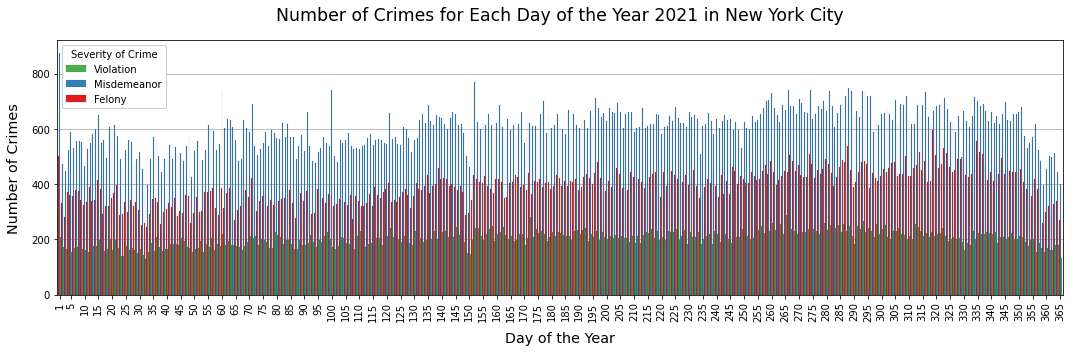

In [848]:
# fig, axe = plt.subplots(ncols=1,nrows=1,figsize=(8,6),tight_layout=True)
plt.figure(figsize=(15,5),tight_layout=True)
# from matplotlib.pyplot import cm
# color = cm.rainbow(np.linspace(0, 1, df["LAW_CAT_CD"].nunique()+1))
plt.xlim(0,366)
axe = sns.histplot(data=df.sort_values(by="LAW_CAT_CD"), x="DAY_OF_YEAR",hue="LAW_CAT_CD",\
                hue_order=[2,1,0],binwidth=1,binrange=(0.5,365.5),\
                edgecolor="black",alpha=1,multiple="dodge",palette="Set1",zorder=3)
axe.set_title("Number of Crimes for Each Day of the Year 2021 in New York City",fontsize="xx-large",pad=20)
axe.set_xlabel("Day of the Year",labelpad=10,fontsize="x-large")
axe.set_ylabel("Number of Crimes",labelpad=10,fontsize="x-large")
axe.tick_params(left=True)
axe.tick_params(axis="x",labelrotation=90)#,labelsize="small")
axe.legend(title="Severity of Crime",labels=["Violation","Misdemeanor","Felony"],framealpha=1)
plt.xticks([1]+list(range(0,366,5))[1:])
axe.yaxis.grid(True,zorder=0);
plt.show()

This graphs can be a bit difficult to read, so I will make a version where the three severities are graphed separately.

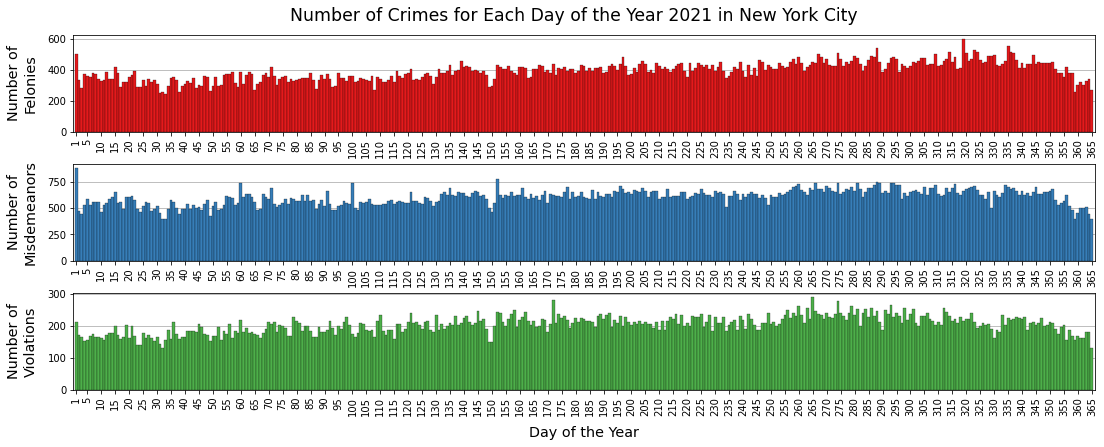

In [849]:
fig, axe = plt.subplots(nrows=3,figsize=(15,6))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.xlim(0,366)
# sns.set_palette(sns.color_palette("tab10",2))
plt.suptitle("Number of Crimes for Each Day of the Year 2021 in New York City",fontsize="xx-large")
for i in range(3):
    sns.histplot(ax = axe[i], data = df.loc[df["LAW_CAT_CD"] == i, : ],\
                        x="DAY_OF_YEAR",\
                        #   hue="LAW_CAT_CD",\
                        binwidth=1,binrange=(0.5,365.5),\
                        edgecolor="black",alpha=1, color=sns.color_palette("Set1")[2-i],\
                        # color order reversal so red is felony, green is violation
                        multiple="dodge",zorder=3)
    crime_severity = ["Violations","Misdemeanors","Felonies"][i]
    axe[i].set_ylabel(f"Number of\n{crime_severity}",labelpad=10,fontsize="x-large")
    axe[i].set_xlabel("",visible=False)
    axe[i].tick_params(left=True)
    axe[i].yaxis.grid(True);
    axe[i].tick_params(axis="x",labelrotation=90)
    axe[i].set_xticks([1]+list(range(0,366,5))[1:])
    axe[i].set_xlim(0,366)
# Put felonies on the top, violations on the bottom
pos0 = axe[0].get_position()
axe[0].set_position(axe[2].get_position())
axe[2].set_position(pos0)
axe[0].set_xlabel("Day of the Year", fontsize="x-large",labelpad=10,visible=True)
plt.savefig('NY Crime by Day of Year 2021.png', bbox_inches='tight')
plt.show()

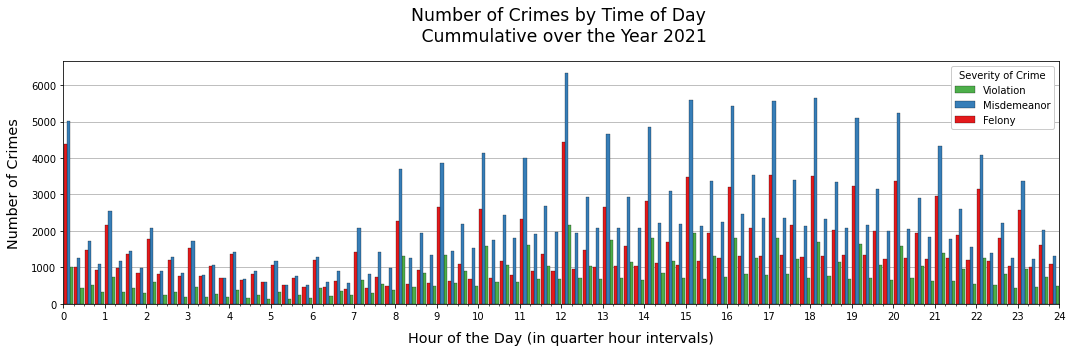

In [850]:
# fig, axe = plt.subplots(ncols=1,nrows=1,figsize=(8,6),tight_layout=True)
from matplotlib.ticker import AutoMinorLocator
plt.figure(figsize=(15,5),tight_layout=True)
# color = cm.rainbow(np.linspace(0, 1, df["LAW_CAT_CD"].nunique()+1))
plt.xlim(0,24)
# zorder is the drawing order, higher numbers are on top, lower on bottom.
axe = sns.histplot(data = df, x="TIME_OF_DAY",hue="LAW_CAT_CD",hue_order=[2,1,0],binwidth=0.25,binrange=(0,25),\
             edgecolor="black",alpha=1,multiple="dodge",palette="Set1", shrink=0.9,zorder=3)
axe.set_title("Number of Crimes by Time of Day \n Cummulative over the Year 2021",fontsize="xx-large",pad=20)
axe.set_xlabel("Hour of the Day (in quarter hour intervals)",fontsize="x-large",labelpad=10)
axe.set_ylabel("Number of Crimes",fontsize="x-large",labelpad=10)
axe.yaxis.grid(True,zorder=0);
axe.tick_params(left=True)
axe.tick_params(axis="x")
axe.set_xticks(range(0,25))
plt.xticks(range(25))
axe.xaxis.set_minor_locator(AutoMinorLocator(n=4))
axe.legend(title="Severity of Crime",labels=["Violation","Misdemeanor","Felony"],framealpha=1)
plt.show()

There are some interesting properties in this graph. During the 15 minute interval at the beginning fo the hour spikes the highest, then the 15 minute interval at the half hour spikes the second highest. The consistency throughout the day suggest this is an artifact of the investigation or recording process when deterimining the time. Since it is unlikely that the precise minute of each incident is always known, it would likely be rounded to the nearest hour or half hour as the closest estimate.

However, hour 0 and hour 12 have unusual spikes that doesn't match nearby spikes well. This may also be due partially to extra rounding for events that happen near "midnight" and "noon".

## 6 . 2 . Crime and Premise Type

As seen in the plot, the comment I made earlier about merging some of the category values may be prudent.

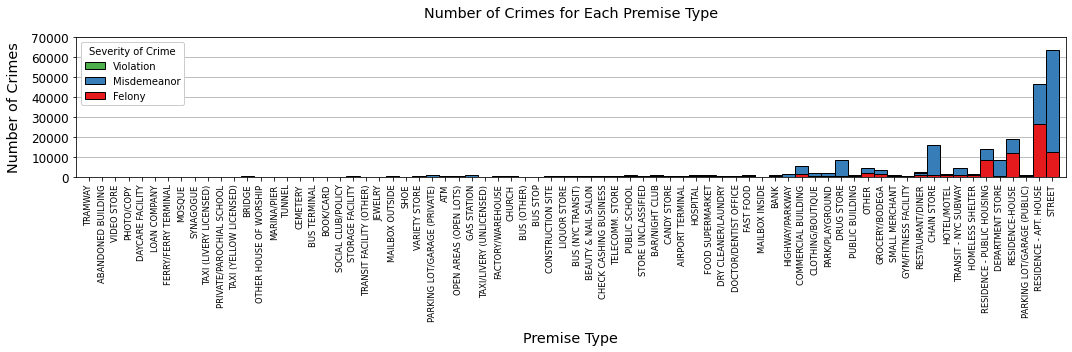

In [851]:
# fig, axe = plt.subplots(ncols=1,nrows=1,figsize=(8,6),tight_layout=True)
import matplotlib.ticker
plt.figure(figsize=(15,5),tight_layout=True)
axe = sns.histplot(data=df, x="PREM_TYP_DESC",hue="LAW_CAT_CD",palette="Set1",\
             edgecolor="black",alpha=1,zorder=3)
axe.set_title("Number of Crimes for Each Premise Type",fontsize="x-large",pad=20)
axe.set_xlabel("Premise Type",fontsize="x-large",labelpad=10)
axe.set_ylabel("Number of Crimes",fontsize="x-large",labelpad=10)
axe.yaxis.grid(True,zorder=0);
axe.set_yscale("linear")
axe.set_yticks(range(0,80000,10000))
axe.tick_params(left=True,axis="y",labelsize="large")
axe.tick_params(axis="x",labelrotation=90,labelsize="small")
plt.xlim(df["PREM_TYP_DESC"].nunique(),-1)
axe.legend(title="Severity of Crime",labels=["Violation","Misdemeanor","Felony"],loc=0,framealpha=1)
plt.savefig('NY Crime by Premise Type.png', bbox_inches='tight')
plt.show()

## 6 . 3 . Crime and Precinct

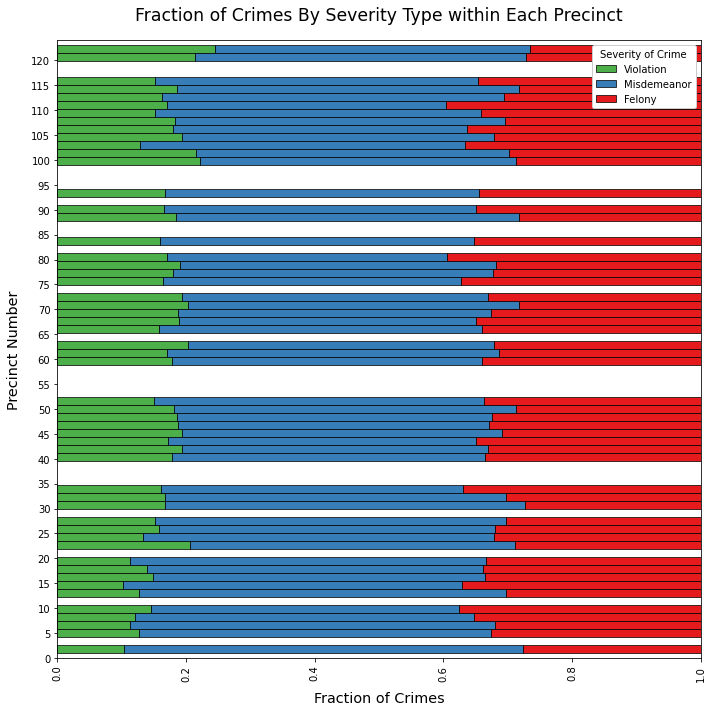

In [852]:
# fig, axe = plt.subplots(ncols=1,nrows=1,figsize=(8,6),tight_layout=True)
plt.figure(figsize=(10,10),tight_layout=True)

# temporary convertion to int
df["ADDR_PCT_CD"] = df["ADDR_PCT_CD"].apply(int)


axe = sns.histplot(data=df, y="ADDR_PCT_CD",hue="LAW_CAT_CD",hue_order=[2,1,0],palette="Set1",\
             edgecolor="black",alpha=1,multiple="fill")
axe.set_title("Fraction of Crimes By Severity Type within Each Precinct",fontsize="xx-large",pad=20)
axe.set_ylabel("Precinct Number",labelpad=10, fontsize="x-large")
axe.set_xlabel("Fraction of Crimes",fontsize="x-large",labelpad=10)
axe.yaxis.grid(False);
plt.ylim(0, df["ADDR_PCT_CD"].unique().max()+1)
axe.set_yticks(range(0,125,5))
axe.tick_params(left=True)
axe.tick_params(axis="x",labelrotation=90)
axe.legend(title="Severity of Crime",labels=["Violation","Misdemeanor","Felony"],framealpha=1)
plt.savefig('NY Crime Ratios in Precincts.png', bbox_inches='tight')
plt.show()

# undo conversion
df["ADDR_PCT_CD"] = df["ADDR_PCT_CD"].apply(str)

The distribution of crimes by severity appears to be very similar across most precints.



In [853]:
# import squarify    # pip install squarify (algorithm for treemap)
# from matplotlib.pyplot import cm
# color = cm.rainbow(np.linspace(0, 1, df_sales["Outlet_Type"].nunique()+1))

display(df.groupby("LAW_CAT_CD")["LAW_CAT_CD"].value_counts())
display(df.loc[ df["LAW_CAT_CD"] == 0 , : ].sum())

# plt.figure(figsize=(12,6))
# squarify.plot(sizes=items_per_outlet,value=items_per_outlet,label=items_per_outlet.index,pad=True,color=color,alpha=0.5)
# #, label=df_sales["Item_Type"].value_counts().index ,value=df_sales["Item_Type"].value_counts() ,color=color,alpha=0.5,text_kwargs={"fontsize":12}

# plt.title("Number of Items Sold Within Each Category (All Outlets)")
# plt.axis('off')
# plt.show()

LAW_CAT_CD  LAW_CAT_CD
0           0              74346
1           1             220746
2           2             143326
Name: LAW_CAT_CD, dtype: int64

ADDR_PCT_CD      4746115477373616218101104601074875694123504510...
DAY_OF_YEAR                                               14117438
TIME_OF_DAY                                              1024226.0
LAW_CAT_CD                                                       0
PREM_TYP_DESC    RESIDENCE - APT. HOUSERESIDENCE - APT. HOUSERE...
Latitude                                             3028354.47901
Longitude                                           -5495733.95056
DAY_OF_WEEK                                                 220132
dtype: object

# 7 . Correlation

Premise type descriptions are not included in the heatmap as they are categorical.


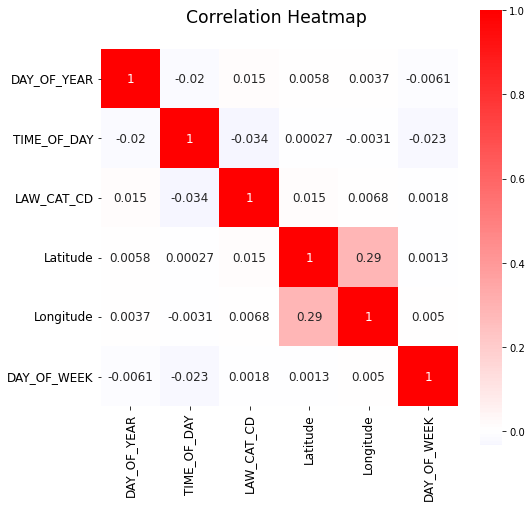

In [854]:
plt.figure(figsize=(8,8))
corr = df.corr()
heat_ax = sns.heatmap(corr,cmap='bwr',annot=True,square=True,center=0,annot_kws={"fontsize":"large"})
heat_ax.set_title("Correlation Heatmap \n ", fontsize="xx-large");
heat_ax.xaxis.grid(False);
heat_ax.tick_params(axis="x",labelrotation=90,labelsize="large")
heat_ax.tick_params(axis="y",labelrotation=0,labelsize="large")

Strickly speaking, the precincts are categorical. However, the names are numbers and thus included in this correlation heatmap. The correlation that the precincts have with the global coordinates comes from the numbering scheme, which has the precinct predominantly increasing in numerical value going from the southwest toward the northeast.There are a few significant jumps that break this pattern.

It would appear that I can determine there is almost no linear correlation between the severity of the crime and the precinct the crime occurs in. This was already suggested by the previous plot showing the ratios of the severity levels within each precinct.

# 8 . Preprocessing

For this classification analysis (with 3 target values), the models I will try be be a random forest and a K-nearest neighbors.

First, the preprocessser will be constructed that will feed data to each model.

In [855]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn import set_config
set_config(display="diagram")

## 8 . 1 . Validation Split

In [856]:
# Seperate the data into feature matrix and target vector
X = df.drop(columns="LAW_CAT_CD")
y = df["LAW_CAT_CD"]

# Split the data in to training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

## 8 . 2 . Column Selectors

In [857]:
# numeric feature selector
num_selector = make_column_selector(dtype_include = "number")
# nominal feature selector
cat_selector = make_column_selector(dtype_include = "object")

## 8 . 3 . Imputers

There is no remaining missing data, so no columns need imputation.

## 8 . 4 . Data Transformers

The numeric features will be scaled to a standard-score ($z=\frac{x-\mu}{\sigma}$).

The nominal features will be one-hot encoded.

In [858]:
# scaler transformer
scaler = StandardScaler()
# one-hot encoder
onehot = OneHotEncoder(handle_unknown = "ignore", sparse = False)

## 8 . 5 . Pipelines

In [859]:
# numeric pipeline
num_pipe = make_pipeline(scaler)

# nominal pipeline
cat_pipe = make_pipeline(onehot)

## 8 . 6 . Column Transformer

In [860]:
# numeric tuple
num_tuple = ( num_pipe, num_selector )

# nominal tuple
cat_tuple = ( cat_pipe, cat_selector )

In [861]:
preprocessor = make_column_transformer( num_tuple, cat_tuple)
display(preprocessor)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feb74bc5210>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feb71a51d10>)])

# 9 . Model 0: Baseline

This will be a baseline comparision model. Any model with predictive power should perform better than the baseline model.

## 9 . 1 . Baseline Pipeline

In [862]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
base_classifier = DummyClassifier(strategy="most_frequent",random_state=42)

base_pipe = make_pipeline(preprocessor, base_classifier)
base_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb74bc5210>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb71a51d10>)])),
                ('dummyclassifier',
                 DummyClassifier(random_state=42, strategy='most_frequent'))])

## 9 . 2 . Baseline Default

In [863]:
%%time
base_pipe.fit(X_train,y_train);

CPU times: user 603 ms, sys: 416 ms, total: 1.02 s
Wall time: 1.01 s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb74bc5210>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb71a51d10>)])),
                ('dummyclassifier',
                 DummyClassifier(random_state=42, strategy='most_frequent'))])

In [864]:
base_default_predict_train = base_pipe.predict(X_train)
base_default_predict_test = base_pipe.predict(X_test)

base_default_report_train = classification_report(y_train, base_default_predict_train, zero_division = 0)
base_default_report_test = classification_report(y_test, base_default_predict_test, zero_division = 0)

print("Metrics from the Baseline Model Used on the Training Data:\n",base_default_report_train )
print("Metrics from the Baseline Model Used on the Testing Data\n", base_default_report_test )

Metrics from the Baseline Model Used on the Training Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     55648
           1       0.50      1.00      0.67    165532
           2       0.00      0.00      0.00    107633

    accuracy                           0.50    328813
   macro avg       0.17      0.33      0.22    328813
weighted avg       0.25      0.50      0.34    328813

Metrics from the Baseline Model Used on the Testing Data
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     18698
           1       0.50      1.00      0.67     55214
           2       0.00      0.00      0.00     35693

    accuracy                           0.50    109605
   macro avg       0.17      0.33      0.22    109605
weighted avg       0.25      0.50      0.34    109605



The default Baseline Model performs equally poorly on both the training and testing data.

The accuracy of 0.50 indicates it is no better than flipping a coin.

## 9 . 3 . Baseline Grid Search

A grid search will be used to determine if there might be any better versions of the baseline model by implementing different hyperparameters.

In [865]:
# dictionary of hyperparameter ranges to use in the grid search
base_grid_params = {'dummyclassifier__strategy': ["stratified", "uniform","prior","most_frequent", "constant"],\
                    'dummyclassifier__constant': [0,1,2]}

In [866]:
%%time
from sklearn.model_selection import GridSearchCV
# instantiate the grid-search model for the random baseline classifier
base_grid = GridSearchCV(base_pipe, base_grid_params,scoring="accuracy");
base_grid.fit(X_train,y_train);
base_grid.best_params_

CPU times: user 51.7 s, sys: 2.33 s, total: 54 s
Wall time: 53.8 s


In [867]:
base_best = base_pipe.set_params(**base_grid.best_params_)

In [868]:
%%time
base_best.fit(X_train,y_train)

base_best_predict_train = base_best.predict(X_train)
base_best_predict_test  = base_best.predict(X_test)

base_best_report_train = classification_report(y_train, base_best_predict_train, zero_division = 0)
base_best_report_test = classification_report(y_test, base_best_predict_test, zero_division = 0)

print("Best Metrics from the Baseline Model Used on the Training Data:\n", base_best_report_train)
print("Best Metrics from the Baseline Model Used on the Testing Data:\n", base_best_report_test)

Best Metrics from the Baseline Model Used on the Training Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     55648
           1       0.50      1.00      0.67    165532
           2       0.00      0.00      0.00    107633

    accuracy                           0.50    328813
   macro avg       0.17      0.33      0.22    328813
weighted avg       0.25      0.50      0.34    328813

Best Metrics from the Baseline Model Used on the Testing Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     18698
           1       0.50      1.00      0.67     55214
           2       0.00      0.00      0.00     35693

    accuracy                           0.50    109605
   macro avg       0.17      0.33      0.22    109605
weighted avg       0.25      0.50      0.34    109605

CPU times: user 2.05 s, sys: 32.9 ms, total: 2.08 s
Wall time: 2.07 s


No improvement after adjusting the hyperparameters.

# 10 . Model 1: Random Forest Classifier

The first model to be used is a random forest.

## 10 . 1 . Random Forest Pipeline

In [869]:
from sklearn.ensemble import RandomForestClassifier
# instatiate the random forest model
forest_classifier = RandomForestClassifier(random_state = 42)
# Create the pipeline
forest_pipe =  make_pipeline(preprocessor, forest_classifier)
forest_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb74bc5210>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb71a51d10>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

## 10 . 2 . Random Forest Default

In [870]:
%%time
forest_pipe.fit(X_train,y_train);

CPU times: user 3min 51s, sys: 2.31 s, total: 3min 54s
Wall time: 3min 52s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb74bc5210>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb71a51d10>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [871]:
forest_default_predict_train = forest_pipe.predict(X_train)
forest_default_predict_test = forest_pipe.predict(X_test)

forest_default_report_train = classification_report(y_train, forest_default_predict_train)
forest_default_report_test = classification_report(y_test, forest_default_predict_test) 

print("Metrics from the Random Forest Model Used on the Training Data:\n", forest_default_report_train )
print("Metrics from the Random Forest Model Used on the Testing Data:\n",forest_default_report_test )

Metrics from the Random Forest Model Used on the Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     55648
           1       0.99      1.00      0.99    165532
           2       0.99      0.99      0.99    107633

    accuracy                           0.99    328813
   macro avg       0.99      0.99      0.99    328813
weighted avg       0.99      0.99      0.99    328813

Metrics from the Random Forest Model Used on the Testing Data:
               precision    recall  f1-score   support

           0       0.35      0.17      0.23     18698
           1       0.55      0.72      0.62     55214
           2       0.45      0.36      0.40     35693

    accuracy                           0.51    109605
   macro avg       0.45      0.42      0.42    109605
weighted avg       0.48      0.51      0.48    109605



With the default hyperparameters, the random forest performs barely better than the baseline model. It has an accuracy 0.51 compared to the baseline model accuracy of 0.50. Other metrics are similarly poor.

## 10 . 3 . Random Forest Grid Search

In [874]:
# dictionary of hyperparameter ranges to use in the grid search
forest_grid_params = {"randomforestclassifier__max_depth": range(3,13,3),\
                    "randomforestclassifier__max_features": ["sqrt","log2",None]}

In [875]:
%%time
# instantiate the grid-search model for the random forest classifier
forest_grid = GridSearchCV(forest_pipe, forest_grid_params,scoring="accuracy")
forest_grid.fit(X_train,y_train)
forest_grid.best_params_

CPU times: user 1h 58min 55s, sys: 16.3 s, total: 1h 59min 12s
Wall time: 1h 58min 19s


In [ ]:
forest_best = forest_pipe.set_params(**forest_grid.best_params_)
forest_best.get_params()

In [879]:
%%time
forest_best.fit(X_train,y_train)

forest_best_predict_train = forest_best.predict(X_train)
forest_best_predict_test  = forest_best.predict(X_test)

forest_best_report_train = classification_report(y_train, forest_best_predict_train)
forest_best_report_test = classification_report(y_test, forest_best_predict_test)

print("Best Random Forest Model Metrics Used on the Training Data:\n", forest_best_report_train)
print("Best Random Forest Model Metrics Used on the Testing Data:\n", forest_best_report_test)

Best Random Forest Model Metrics Used on the Training Data:
               precision    recall  f1-score   support

           0       0.62      0.01      0.01     55648
           1       0.52      0.94      0.67    165532
           2       0.60      0.17      0.26    107633

    accuracy                           0.53    328813
   macro avg       0.58      0.37      0.31    328813
weighted avg       0.56      0.53      0.42    328813

Best Random Forest Model Metrics Used on the Testing Data:
               precision    recall  f1-score   support

           0       0.39      0.00      0.01     18698
           1       0.51      0.93      0.66     55214
           2       0.53      0.15      0.23     35693

    accuracy                           0.52    109605
   macro avg       0.48      0.36      0.30    109605
weighted avg       0.50      0.52      0.41    109605

CPU times: user 8min 15s, sys: 996 ms, total: 8min 16s
Wall time: 8min 12s


This random forest model doesn't perform significantly better than the baseline model.

# 11 . Model 2: KNN

The second model to be used is a K-Nearest Neighbors model.

## 11 . 1 . KNN Pipeline

In [880]:
from sklearn.neighbors import KNeighborsClassifier

In [881]:
knn_classifier = KNeighborsClassifier(n_neighbors = 10)

knn_pipe = make_pipeline(preprocessor, knn_classifier)
knn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb74bc5210>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb71a51d10>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

## 11 . 2 . KNN Default

In [884]:
%%time
knn_pipe.fit(X_train,y_train);

CPU times: user 659 ms, sys: 561 ms, total: 1.22 s
Wall time: 1.23 s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb74bc5210>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb71a51d10>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [885]:
%%time
knn_default_predict_train = knn_pipe.predict(X_train)
knn_default_predict_test = knn_pipe.predict(X_test)

knn_default_report_train = classification_report(y_train, knn_default_predict_train)
knn_default_report_test = classification_report(y_test, knn_default_predict_test) 

print("Training Data set:\n", knn_default_report_train )
print("Testing Data set:\n",knn_default_report_test )

Training Data set:
               precision    recall  f1-score   support

           0       0.47      0.30      0.37     55648
           1       0.61      0.81      0.70    165532
           2       0.58      0.40      0.48    107633

    accuracy                           0.59    328813
   macro avg       0.55      0.50      0.51    328813
weighted avg       0.58      0.59      0.57    328813

Testing Data set:
               precision    recall  f1-score   support

           0       0.29      0.18      0.22     18698
           1       0.54      0.72      0.61     55214
           2       0.41      0.28      0.34     35693

    accuracy                           0.48    109605
   macro avg       0.41      0.39      0.39    109605
weighted avg       0.45      0.48      0.46    109605

CPU times: user 1h 35min 6s, sys: 2min 53s, total: 1h 37min 59s
Wall time: 1h 11min 8s


## 11 . 3 . KNN Grid Search

In [ ]:
knn_grid_params = {"kneighborsclassifier__p": range(1,2),\
                   "kneighborsclassifier__weights": ["uniform","distance"]}

In [ ]:
%%time
# instantiate the grid-search model for the knn classifier
knn_grid = GridSearchCV(knn_pipe,knn_grid_params,scoring="accuracy")
knn_grid.fit(X_train,y_train)
knn_grid.best_params_

In [ ]:
knn_best = knn_pipe.set_params(**knn_grid.best_params_)

In [886]:
%%time
# Temporarily skipping the prediction of the best knn model due to time constraints.

# knn_best.fit(X_train,y_train)

# knn_best_predict_train = knn_best.predict(X_train)
# knn_best_predict_test  = knn_best.predict(X_test)

# knn_best_report_train = classification_report(y_train,knn_best_predict_train)
# knn_best_report_test = classification_report(y_test,knn_best_predict_test)

# due to temporarily skipping the predition of the best knn model, the default is considered the best
knn_best_report_train = knn_default_report_train
knn_best_report_test  = knn_default_report_test

print("Best KNN Model Metrics Used on the Training Data:\n", knn_best_report_train)
print("Best KNN Model Metrics Used on the Testing Data:\n", knn_best_report_test)

Best KNN Model Metrics Used on the Training Data:
               precision    recall  f1-score   support

           0       0.47      0.30      0.37     55648
           1       0.61      0.81      0.70    165532
           2       0.58      0.40      0.48    107633

    accuracy                           0.59    328813
   macro avg       0.55      0.50      0.51    328813
weighted avg       0.58      0.59      0.57    328813

Best KNN Model Metrics Used on the Testing Data:
               precision    recall  f1-score   support

           0       0.29      0.18      0.22     18698
           1       0.54      0.72      0.61     55214
           2       0.41      0.28      0.34     35693

    accuracy                           0.48    109605
   macro avg       0.41      0.39      0.39    109605
weighted avg       0.45      0.48      0.46    109605

CPU times: user 58 µs, sys: 978 µs, total: 1.04 ms
Wall time: 902 µs


# 12 . Model 3: Logistic Regression

## 12 . 1 . Logistic Regression Pipeline

In [887]:
from sklearn.linear_model import LogisticRegression

In [897]:
log_classifier = LogisticRegression(max_iter=500,random_state=42)

log_pipe = make_pipeline(preprocessor, log_classifier)
log_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb74bc5210>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb71a51d10>)])),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])

## 12 . 2 .Logistic Regression Default

In [898]:
%%time
log_pipe.fit(X_train,y_train);

CPU times: user 3min 9s, sys: 45.7 s, total: 3min 55s
Wall time: 2min 2s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb74bc5210>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feb71a51d10>)])),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])

In [899]:
%%time
log_default_predict_train = log_pipe.predict(X_train)
log_default_predict_test = log_pipe.predict(X_test)

log_default_report_train = classification_report(y_train, log_default_predict_train)
log_default_report_test = classification_report(y_test, log_default_predict_test) 

print("Training Data set:\n", log_default_report_train )
print("Testing Data set:\n",log_default_report_test )

Training Data set:
               precision    recall  f1-score   support

           0       0.36      0.00      0.00     55648
           1       0.51      0.95      0.66    165532
           2       0.47      0.09      0.15    107633

    accuracy                           0.51    328813
   macro avg       0.45      0.35      0.27    328813
weighted avg       0.47      0.51      0.38    328813

Testing Data set:
               precision    recall  f1-score   support

           0       0.39      0.00      0.00     18698
           1       0.51      0.95      0.66     55214
           2       0.47      0.09      0.15     35693

    accuracy                           0.51    109605
   macro avg       0.46      0.35      0.27    109605
weighted avg       0.48      0.51      0.38    109605

CPU times: user 1.92 s, sys: 272 ms, total: 2.19 s
Wall time: 1.82 s


## 12 . 3 . Logistic Regression Grid Search

In [901]:
log_grid_params = {"logisticregression__penalty": ["l1","l2","elasticnet"],\
                   "logisticregression__solver": ["saga"]}

In [902]:
%%time
# instantiate the grid-search model for the knn classifier
log_grid = GridSearchCV(log_pipe,log_grid_params,scoring="accuracy")
log_grid.fit(X_train,y_train)
log_grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1473, in fit
    % self.l1_ratio
ValueError: l1_ratio must be between 0 and 1; got (l

CPU times: user 24min 22s, sys: 2.54 s, total: 24min 24s
Wall time: 24min 15s


In [903]:
log_best = log_pipe.set_params(**log_grid.best_params_)

In [904]:
%%time
log_best.fit(X_train,y_train)

log_best_predict_train = log_best.predict(X_train)
log_best_predict_test  = log_best.predict(X_test)

log_best_report_train = classification_report(y_train,log_best_predict_train)
log_best_report_test = classification_report(y_test,log_best_predict_test)

print("Best Logistic Regression Model Metrics Used on the Training Data:\n", log_best_report_train)
print("Best Logistic Regression Model Metrics Used on the Testing Data:\n", log_best_report_test)

Best Logistic Regression Model Metrics Used on the Training Data:
               precision    recall  f1-score   support

           0       0.35      0.00      0.00     55648
           1       0.51      0.95      0.66    165532
           2       0.47      0.09      0.15    107633

    accuracy                           0.51    328813
   macro avg       0.45      0.35      0.27    328813
weighted avg       0.47      0.51      0.38    328813

Best Logistic Regression Model Metrics Used on the Testing Data:
               precision    recall  f1-score   support

           0       0.41      0.00      0.00     18698
           1       0.51      0.95      0.66     55214
           2       0.47      0.09      0.15     35693

    accuracy                           0.51    109605
   macro avg       0.46      0.35      0.27    109605
weighted avg       0.48      0.51      0.38    109605

CPU times: user 3min 12s, sys: 419 ms, total: 3min 13s
Wall time: 3min 11s


# 12 . Confusion Matrices

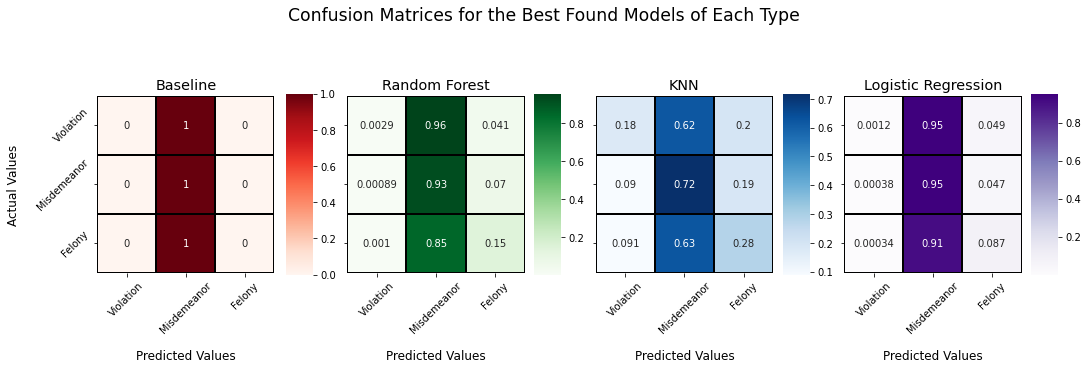

In [925]:
from sklearn.metrics import confusion_matrix
#values normalized along the 'true' axis.
base_best_confusion_matrix_norm = confusion_matrix(y_test, base_best_predict_test, normalize="true")
forest_best_confusion_matrix_norm = confusion_matrix(y_test,forest_best_predict_test, normalize="true")
knn_best_confusion_matrix_norm = confusion_matrix(y_test, knn_default_predict_test, normalize="true")
log_best_confusion_matrix_norm = confusion_matrix(y_test, log_best_predict_test, normalize="true")

labels=["Violation","Misdemeanor","Felony"]

fig, axes = plt.subplots(ncols = 4, figsize=(15,5),constrained_layout=True,sharey=True)
fig.suptitle("Confusion Matrices for the Best Found Models of Each Type", fontsize="xx-large")
sns.heatmap(base_best_confusion_matrix_norm,xticklabels=labels,yticklabels=labels,annot=True,square=True,cmap="Reds",ax=axes[0],linecolor="black",linewidths=1,cbar_kws={"shrink":0.6})
sns.heatmap(forest_best_confusion_matrix_norm,xticklabels=labels,yticklabels=labels,annot=True,square=True,cmap="Greens",ax=axes[1],linecolor="black",linewidths=1,cbar_kws={"shrink":0.6})
sns.heatmap(knn_best_confusion_matrix_norm,xticklabels=labels,yticklabels=labels,annot=True,square=True,cmap="Blues",ax=axes[2],linecolor="black",linewidths=1,cbar_kws={"shrink":0.6})
sns.heatmap(log_best_confusion_matrix_norm,xticklabels=labels,yticklabels=labels,annot=True,square=True,cmap="Purples",ax=axes[3],linecolor="black",linewidths=1,cbar_kws={"shrink":0.6})
axes[0].set_title("Baseline", fontsize="x-large")
axes[1].set_title("Random Forest", fontsize="x-large")
axes[2].set_title("KNN", fontsize="x-large")
axes[3].set_title("Logistic Regression", fontsize="x-large")
for c in range(4):
    axes[c].tick_params(axis="y",labelrotation=45)
    axes[c].tick_params(axis="x",labelrotation=45)
    axes[c].set_xlabel("Predicted Values",labelpad=15,fontsize="large")
axes[0].set_ylabel("Actual Values",labelpad=15,fontsize="large")

plt.show()

None of the models perform very well. However the KNN model appears to perform the best out of the 3 different classifiers. Although it predicts misdemeanors with lower precision, it predicts misdemeanors and felonies significantly better than the other models.